In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:

rad0=50
ecc0=0.9
theta0=math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.5235987755982988
0.9
(array([3.66519143, 0.52359878]), 0.5235987755982988, 50, 0.9, array([1., 1.]))


VERIFIED FOR THETA=-45,45,135,180,90,30,-30. VERIFIED FOR ECC =0.001, 0.1,0.5, 0.7, 0.9, 0.95 VERIFIED FOR RAD0=50,75 100 

In [5]:
import getxyuvtwoellipse

In [6]:
xyuvaeqellipse=getxyuvtwoellipse.getxyuveqtwoellipses(initdateqellipse)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50 [3.66519143 0.52359878] 0.9 [-0.8660254  0.8660254] [-0.5  0.5]
coordsep 50
[-43.30127019  43.30127019]
[-25.  25.]
(array([1., 1.]), array([[-8.22724134e+01, -4.75000000e+01,  0.00000000e+00,
         8.11107106e-03, -1.40487872e-02,  0.00000000e+00],
       [ 8.22724134e+01,  4.75000000e+01,  0.00000000e+00,
        -8.11107106e-03,  1.40487872e-02,  0.00000000e+00]]), array([[ 2.39896234e-05,  1.38504155e-05,  0.00000000e+00],
       [-2.39896234e-05, -1.38504155e-05,  0.00000000e+00]]))


In [7]:
import RK4implicit

In [8]:
import OrbitDiffEq

In [9]:
masses, xvec,avec=xyuvaeqellipse
ODEeq= OrbitDiffEq.OrbitDiffEq(masses,xvec,avec,0.0)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0
[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0


In [10]:
print(xyuvaeqellipse)

(array([1., 1.]), array([[-8.22724134e+01, -4.75000000e+01,  0.00000000e+00,
         8.11107106e-03, -1.40487872e-02,  0.00000000e+00],
       [ 8.22724134e+01,  4.75000000e+01,  0.00000000e+00,
        -8.11107106e-03,  1.40487872e-02,  0.00000000e+00]]), array([[ 2.39896234e-05,  1.38504155e-05,  0.00000000e+00],
       [-2.39896234e-05, -1.38504155e-05,  0.00000000e+00]]))


In [11]:
import timestep

In [12]:
numsteps=6000
dt=1
outputevery=20
nptimes, npstar1x, npstar2x, npstar1a, npstar2a= timestep.timestep(numsteps,dt,xyuvaeqellipse,outputevery)

In [13]:
import ellipsefns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import numpy as np
# create a new plot with default tools, using figure
p = figure(title="Elliptical orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees", plot_width=400, plot_height=400, x_range=(-200,200), y_range=(-200,200))
t = np.linspace(0, 2*math.pi, 100)
#theta0=math.pi/6.
# add a circle renderer with x and y coordinates, size, color, and alpha
p.line(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1), line_color="cyan", legend="Ideal Ellipse 1")
p.line(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),line_color="black", legend="Ideal Ellipse 2")
p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")



p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the

Loading BokehJS ...

In [14]:
print(theta0)

0.5235987755982988


In [15]:
print(math.pi/6.0)

0.5235987755982988


45.0 50 21.79449471770337 0.5235987755982988


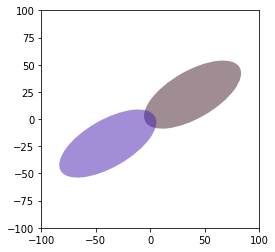

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

focus=ellipsefns.getfocus(rad0,ecc0)
b=ellipsefns.getsemiminor(rad0,ecc0)
theta0deg=theta0*180/math.pi
signs=[1,-1]
ells = [Ellipse(xy=[focus*signi*np.cos(theta0),focus*signi*np.sin(theta0)],
                width=2*rad0, height=2*b,
                angle=theta0deg)
                for signi in signs]
                    

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.5)
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(-2*rad0,2*rad0)
ax.set_ylim(-2*rad0, 2*rad0)

print(focus, rad0,b,theta0)
plt.show()